# Give me some Credit!

En esta práctica se busca un método para reducir la tasa de morosidad en la concesión de créditos. Es decir, decidir en función de datos históricos de los que se dispone y de la información del cliente si se puede confiar en él para el reintegro de dicho préstamos o si es arriesgado darle el crédito. Para ello se procede a analizar datos de otros años e intentar construir un modelo clasificador adecuado para ser aplicado en nuevos clientes.

## Datos

Se trabaja con datos obtenidos a partir del proyecto de Kaggle llamado `'Give me some Credit!'` con fecha 22 de Diciembre de 2018. Dichos datos hacen referencia a distintos créditos concedidos en el pasado. Su tamaño y las variables por los que están compuestos se explican más adelante.

## Carga y limpieza inicial de los datos

En primer lugar se importan las herramientas necesarias para cargar los datos y realizar el análisis exploratorio:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A continuación se cargan los datos de entrenamiento.
(No tengo muy claro si no sería mejor juntarlos con lo de test pero bueno, ese es un cambio sencillo)

In [2]:
training_data = pd.read_csv('data/training.csv')

Se realiza una pequeña previsualización de los datos para garantizar que todo se ha leído de manera correcta. 

In [3]:
training_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Se observa que se ha generado una columna extra con el índice denominada `Unnamed`. Se prescinde de dicha columna:

In [4]:
training_data = training_data.iloc[:,1:12]

In [5]:
training_data.shape

(150000, 11)

In [6]:
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
training_data.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


Así se trabajará con 150.000 registros de 11 variables que se explican a continuación.

In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


La variable `SeriousDlqin2yrs` indica si el prestatario se ha retrasado en más de 90 días en el pago de sus deudas incurriendo en morosidad. Valdrá 0 en caso de no ser así y uno en caso de que sí. Esta variable no presenta huecos.

La variable `Revolting Utilization of Unsecured Lines` representa el balance total de todas las líneas personales de crédito y tarjetas de crédito exceptuando hipotecas y deudas a plazos dividido por la suma de los límites de créditos.
Esta variable viene representada por un número real y no presenta ningún NA en la base de datos.

La variable `age` indica la edad del solicitante.Se mide en años. No presenta ningún hueco de nuevo.

La variable `Number of Time 30-59 Days Past Due Not Worse` indica el número de veces que el solicitante se ha retrasado entre 30 y 59 días (no más) en pagar alguna de sus deudas. Esta variable viene representada por un entero y no presenta ningún NA en la base de datos.

La variable `Debt Ratio` es el cociente de la suma de los pagos mensuales de deuda, pensiones alimenticias y costes de vida dividido por los ingresos mensuales totales. Viene dada por un número real y no presenta valores NA en la base de datos con la que se trabaja.

La variable `Monthly Income` representa los ingresos mensuales del candidato. Viene dado en números reales y en la base de datos en la que se trabaja hay 29731 para los que se desconocen.

La variable `Number of Open Credit Lines and Loans` indica el número de instrumentos de crédito (tarjetas) y deudas (hipotecas, préstamos automovilísticos) que mantiene abiertos el candidato. La variable viene dada por un número entero y no presenta valores no definidos.

La variable `Number of Times 90 Days Late` mide el número de veces que el candidato se ha retrasado más de 90 días en un pago. La variable viene dada por un número entero y no presenta valores no definidos.

La variable `Number Real Estate Loans Or Lines` mide el número de líneas de crédito relacionadas con el sector inmobiliario (hipotecas, por ejemplo) abiertas actualmente por el candidato. La variable viene dada por un número entero y no presenta valores no definidos.

La variable `NumberOfTime60-89DaysPastDueNotWorse` mide el número de veces que el candidato se ha retrasado entre 60 y 89 días como máximo en los últimos dos años. La variable viene dada por un número entero y no presenta valores no definidos.

La variable `NumberOfDependents` representa el número de personas dependientes del candidato (esposa, hijos...) excluyendo al propio candidato. La variable viene dada por un número entero y presenta 3924 valores no definidos.

En este estudio se plantea la eliminación de las personas que presentan algún hueco en sus registros pues aunque solo presentan huecos en dos variables: ingresos mensuales y número de personas dependientes estas dos variables (sobre todo la primera) se consideran relevante pera la posterior clasificación:

In [9]:
training_data.shape

(150000, 11)

In [10]:
training_data = training_data.dropna()

In [11]:
training_data.shape

(120269, 11)

In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null float64
dtypes: float64(4), int64(7)
memory usage: 11.0 MB


Se han perdido 29731 registros pero a cambio se cuenta con 120269 registros con todos los datos disponibles.

In [13]:
training_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [14]:
training_data.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.177282
age                                       51.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.296023
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

Algo pasa con el 98 en NumberOfTime30-59DaysPastDueNotWorse:

In [31]:
training_data[training_data['NumberOfTime30-59DaysPastDueNotWorse']==98].shape

(144, 11)

Algo pasa con el 98 en NumberOfTime60-89DaysPastDueNotWorse:

In [58]:
training_data[training_data['NumberOfTime60-89DaysPastDueNotWorse']==98].shape

(144, 11)

Son los mismos:

In [59]:
training_data[training_data['NumberOfTime60-89DaysPastDueNotWorse']==98].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1733,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
4417,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
5073,0,1.0,33,98,0.0,1500.0,0,98,0,98,0.0
6280,1,1.0,51,98,0.0,7500.0,0,98,0,98,0.0


In [33]:
training_data[training_data.age==0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [37]:
training_data[training_data.RevolvingUtilizationOfUnsecuredLines==50708]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
85489,0,50708.0,55,0,0.221757,38000.0,7,0,2,0,0.0


## Selección de variables

Ahora que ya se dispone de una base de datos depurada (en el sentido de que la carga se ha realizado de manera correcta y los NA's han sido eliminados) se procede a la selección de variables para su posterior estudio:

## Gráficos

In [ ]:
# Histogram with Kernel Density Estimate Plot (KDE)
# Source: https://stackoverflow.com/questions/43638851/pandas-histogram-plot-with-kde
def plot_histograms(df, columns):
    # keep total number of subplot
    k = len(df.columns)
    # n = number of chart columns
    n = columns
    m = (k - 1) // n + 1
    
    # Create figure
    fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

    # Iterate through columns, tracking the column name and 
    # which number we are at i. Within each iteration, plot
    for i, (name, col) in enumerate(df.iteritems()):
        r, c = i // n, i % n
        ax = axes[r, c]
        # the histogram
        col.hist(ax=ax)
        # kde = Kernel Density Estimate plot
        ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
        ax2.set_ylim(0)

    # Use tight_layout() as an easy way to sharpen up the layout spacing
    fig.tight_layout()
plot_histograms(df=training_data, columns=10)

En esta sección se plantean histogramas de distintas variables:

Se comienza con un histograma de la edad de los prestatarios:

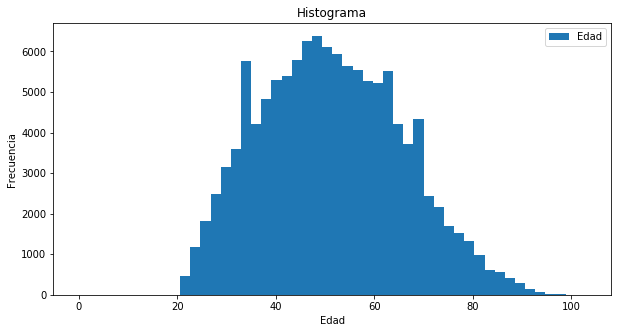

In [15]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.age, label=['Edad'], bins = 50)  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia');

Hay una persona que pide un préstamos con 0 años. __ERROR__

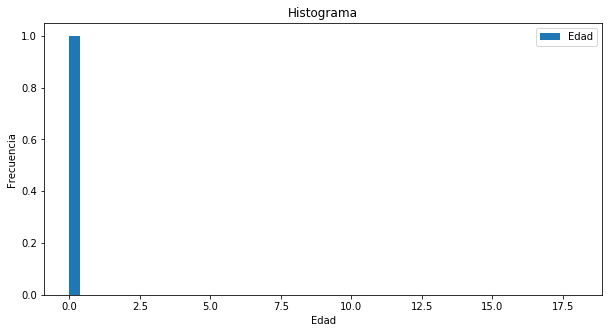

In [32]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.age, label=['Edad'], bins = 50, range=[0,18])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia');

El siguiente gráfico representa la frecuencia de morosidad delictiva:

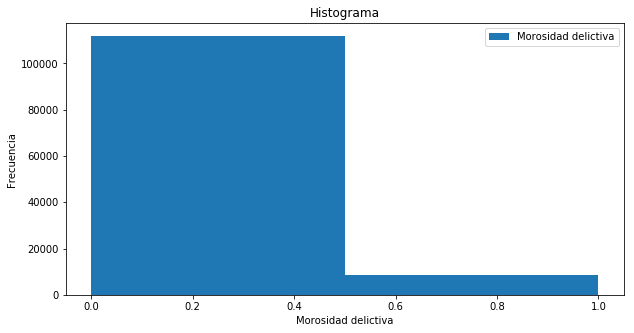

In [26]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.SeriousDlqin2yrs, label=['Morosidad delictiva'], bins = 2)  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Morosidad delictiva')
ax1.set_ylabel('Frecuencia');

A continuación el `RevolvingUtilizationOfUnsecuredLines`:

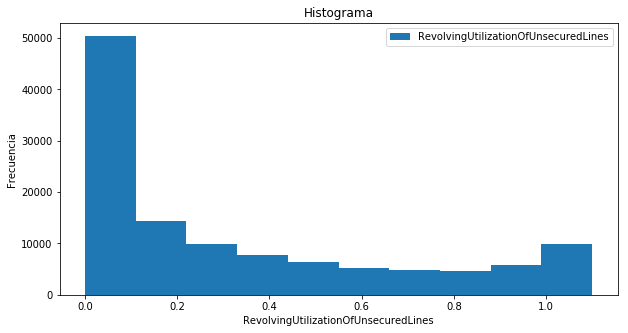

In [41]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.RevolvingUtilizationOfUnsecuredLines, label=['RevolvingUtilizationOfUnsecuredLines'], bins = 10, range=[0,1.1])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('RevolvingUtilizationOfUnsecuredLines')
ax1.set_ylabel('Frecuencia');

A continuación el `Debt Ratio`:

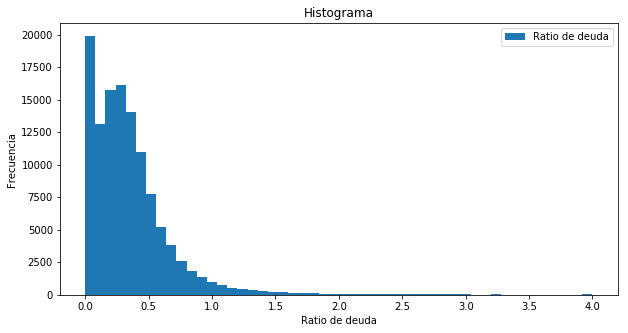

In [44]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data['DebtRatio'], label=['Ratio de deuda'], bins = 50, range=[0,4])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Ratio de deuda')
ax1.set_ylabel('Frecuencia');

El númeor de veces que se retraso entre 30 y 59 días:

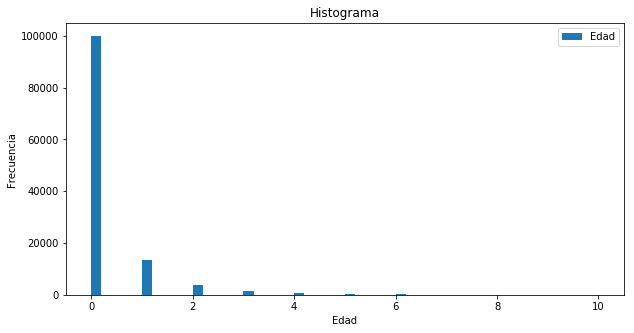

In [30]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data['NumberOfTime30-59DaysPastDueNotWorse'], label=['Edad'], bins = 50, range=[0,10])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia');

Cómo se distribuyen los ingresos mensuales:

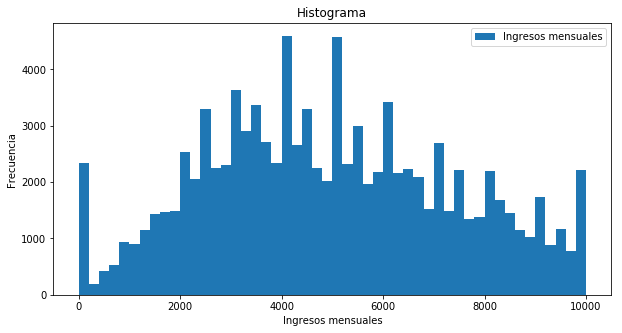

In [46]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.MonthlyIncome, label=['Ingresos mensuales'], bins = 50, range=[0,10000])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Ingresos mensuales')
ax1.set_ylabel('Frecuencia');

Número de préstamos abiertos en el momento:

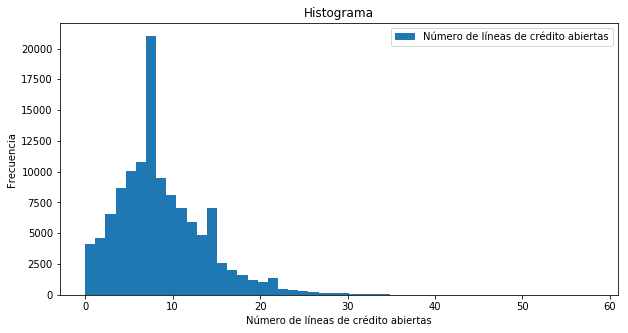

In [49]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.NumberOfOpenCreditLinesAndLoans, label=['Número de líneas de crédito abiertas'], bins = 50)  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Número de líneas de crédito abiertas')
ax1.set_ylabel('Frecuencia');

A continuación el número de veces que ha habido retrasos de 90 días:

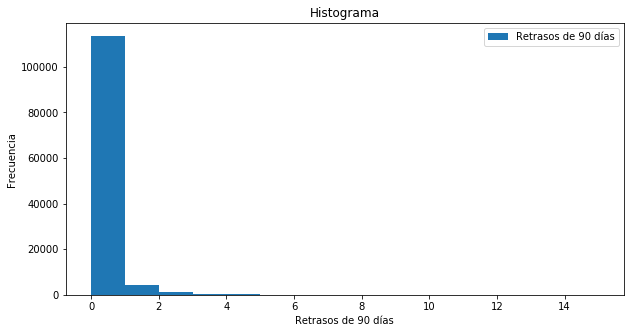

In [53]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.NumberOfTimes90DaysLate, label=['Retrasos de 90 días'], bins = 15, range=[0,15])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Retrasos de 90 días')
ax1.set_ylabel('Frecuencia');

A continuación el histograma relativo al número de préstamos inmobiliarios abiertos:

In [55]:
training_data.NumberRealEstateLoansOrLines.unique()

array([ 6,  0,  1,  4,  2,  3,  5,  8,  7,  9, 17, 10, 12, 11, 16, 26, 14,
       54, 21, 18, 13, 15, 23, 29, 25, 19, 20, 32])

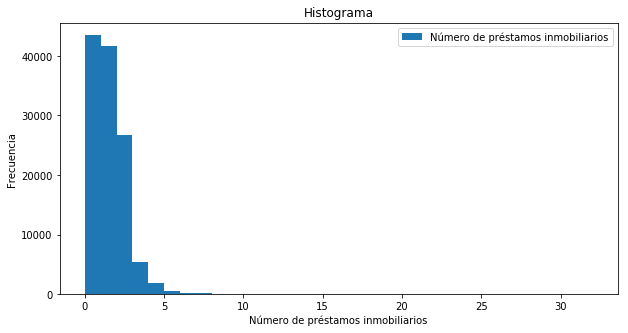

In [56]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.NumberRealEstateLoansOrLines, label=['Número de préstamos inmobiliarios'], bins = 32, range=[0,32])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Número de préstamos inmobiliarios')
ax1.set_ylabel('Frecuencia');

A continuación el número de veces que se ha producido un retraso no mayor a 89 días:

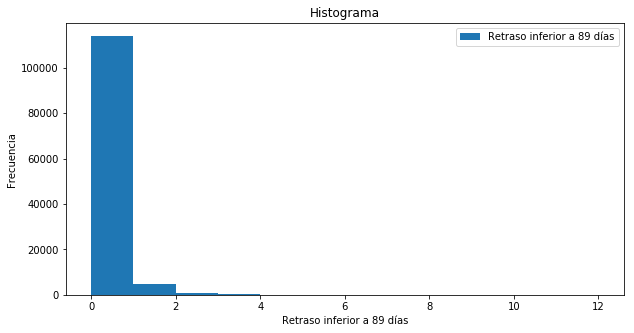

In [61]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data['NumberOfTime60-89DaysPastDueNotWorse'], label=['Retraso inferior a 89 días'], bins = 12, range=[0,12])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Retraso inferior a 89 días')
ax1.set_ylabel('Frecuencia');

Por último se grafica el número de personas dependientes del prestatario:

Solo hay uno con 20:

In [64]:
training_data.NumberOfDependents.unique()

array([ 2.,  1.,  0.,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9., 13.])

In [65]:
training_data[training_data.NumberOfDependents == 20]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6299,0,0.226616,40,1,0.576539,6316.0,11,2,1,0,20.0


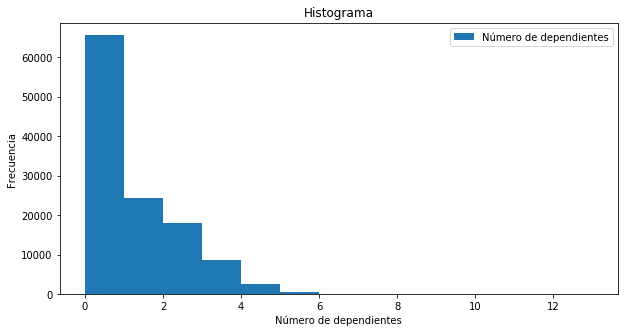

In [66]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   

# representamos una sola variable
ax1.hist(training_data.NumberOfDependents, label=['Número de dependientes'], bins = 13, range=[0,13])  
ax1.legend(loc=0)

ax1.set_title('Histograma')
ax1.set_xlabel('Número de dependientes')
ax1.set_ylabel('Frecuencia');

## Correlaciones

Como todos los datos son numéricos se procede a la obtención de la matriz de correlación:

In [26]:
corr = training_data.corr()
corr

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002386,-0.102685,0.123159,-0.003291,-0.019746,-0.027445,0.111149,-0.003005,0.093836,0.046704
RevolvingUtilizationOfUnsecuredLines,-0.002386,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
age,-0.102685,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
NumberOfTime30-59DaysPastDueNotWorse,0.123159,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
DebtRatio,-0.003291,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.027445,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342
NumberOfTimes90DaysLate,0.111149,-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779
NumberRealEstateLoansOrLines,-0.003005,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997
NumberOfTime60-89DaysPastDueNotWorse,0.093836,-0.000955,-0.043501,0.980131,-0.001801,-0.011116,-0.061505,0.989277,-0.034118,1.000000,-0.005092


La matriz es bastante grande por lo que parece conveniente representar un mapa de calor que permita acceder a la información de una manera más rápida. Para la representación de dicho mapa es necesaria la importación de un nuevo módulo:

In [28]:
import seaborn as sns

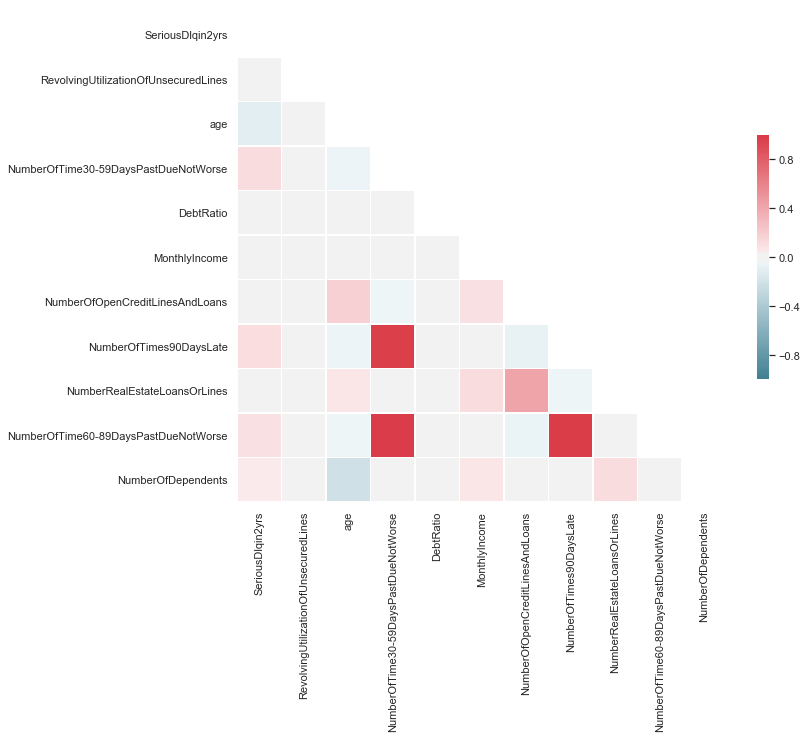

In [31]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Los retrasos en varios días están muy correlacionados entre ellos, a saber: la variable númeor de veces que se retrasa entre 30 y 50 días tiene una correlación de 0.980 con número de veces que se retrasa entre 60 y 89 días y una correlación de 0.975 para retrasos de más de 90 días.

La única correlación inversa algo marcada (y no demasiado pues al consultar la matriz el coeficiente es -0.201 es la existente entre edad y número de personas dependientes. Parece razonable pues las personas jóvenes tienden a tener menos hijos.